## **서울시 인구 데이터**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install geopandas

In [3]:
import geopandas as gpd
import pandas as pd

In [4]:
df_pop=gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/100M_인구격자/서울시_통합/df_pop.shp', encoding = 'utf-8')

In [5]:
# VAL: 격자 내 인구수

df_pop

,gid,lbl,val,geometry
0,다사579454,143.00,143.0,"POLYGON ((957900.000 1945400.000, 957900.000 1..."
1,다사613448,235.00,235.0,"POLYGON ((961300.000 1944800.000, 961300.000 1..."
2,다사585452,19.00,19.0,"POLYGON ((958500.000 1945200.000, 958500.000 1..."
3,다사583456,459.00,459.0,"POLYGON ((958300.000 1945600.000, 958300.000 1..."
4,다사585468,9.00,9.0,"POLYGON ((958500.000 1946800.000, 958500.000 1..."
...,...,...,...,...
64671,다사656567,None,NaN,"POLYGON ((965600.000 1956700.000, 965600.000 1..."
64672,다사636570,None,NaN,"POLYGON ((963600.000 1957000.000, 963600.000 1..."
64673,다사628533,None,NaN,"POLYGON ((962800.000 1953300.000, 962800.000 1..."
64674,다사661574,None,NaN,"POLYGON ((966100.000 1957400.000, 966100.000 1..."


In [6]:
df_pop = df_pop.to_crs(epsg=4329)
df_pop.head()

,gid,lbl,val,geometry
0,다사579454,143.00,143.0,"POLYGON ((127.02366 37.50691, 127.02365 37.507..."
1,다사613448,235.00,235.0,"POLYGON ((127.06216 37.50166, 127.06215 37.502..."
2,다사585452,19.00,19.0,"POLYGON ((127.03046 37.50514, 127.03045 37.506..."
3,다사583456,459.00,459.0,"POLYGON ((127.02817 37.50874, 127.02817 37.509..."
4,다사585468,9.00,9.0,"POLYGON ((127.03037 37.51956, 127.03036 37.520..."


In [7]:
#Pydeck 사용을 위한 함수 정의
import geopandas as gpd 
import shapely # Shapely 형태의 데이터를 받아 내부 좌표들을 List안에 반환합니다. 
def line_string_to_coordinates(line_string): 
    if isinstance(line_string, shapely.geometry.linestring.LineString): 
        lon, lat = line_string.xy 
        return [[x, y] for x, y in zip(lon, lat)] 
    elif isinstance(line_string, shapely.geometry.multilinestring.MultiLineString): 
        ret = [] 
        for i in range(len(line_string)): 
            lon, lat = line_string[i].xy 
            for x, y in zip(lon, lat): 
                ret.append([x, y])
        return ret 

# def multipolygon_to_coordinates(x): 
#     lon, lat = x[0].exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 

def polygon_to_coordinates(x): 
    lon, lat = x.exterior.xy 
    return [[x, y] for x, y in zip(lon, lat)] 


In [8]:
# val 열 na 제거
df_pop['val'] = df_pop['val'].fillna(0)

# 인구 수 정규화
df_pop['nor_pop'] = df_pop['val'] / df_pop['val'].max()

# geometry를 coordinate 형태로 적용
df_pop['coordinates'] = df_pop['geometry'].apply(polygon_to_coordinates)

In [9]:
df_pop['geometry'] 

0        POLYGON ((127.02366 37.50691, 127.02365 37.507...
1        POLYGON ((127.06216 37.50166, 127.06215 37.502...
2        POLYGON ((127.03046 37.50514, 127.03045 37.506...
3        POLYGON ((127.02817 37.50874, 127.02817 37.509...
4        POLYGON ((127.03037 37.51956, 127.03036 37.520...
                               ...                        
64671    POLYGON ((127.11025 37.60908, 127.11024 37.609...
64672    POLYGON ((127.08757 37.61171, 127.08757 37.612...
64673    POLYGON ((127.07870 37.57833, 127.07869 37.579...
64674    POLYGON ((127.11588 37.61541, 127.11588 37.616...
64675    POLYGON ((127.07175 37.60444, 127.07175 37.605...
Name: geometry, Length: 64676, dtype: geometry

In [10]:
# 100X100 grid에서 central point 찾기
df_pop_list = []
df_pop_list2 = []
for i in df_pop['geometry']:
    cent = [[i.centroid.coords[0][0],i.centroid.coords[0][1]]]
    df_pop_list.append(cent)
    df_pop_list2.append(i.centroid)
df_pop['coord_cent'] = 0
df_pop['geo_cent'] = 0
df_pop['coord_cent']= pd.DataFrame(df_pop_list) # pydeck을 위한 coordinate type
df_pop['geo_cent'] = df_pop_list2 # geopandas를 위한 geometry type

In [11]:
df_pop

,gid,lbl,val,geometry,nor_pop,coordinates,coord_cent,geo_cent
0,다사579454,143.00,143.0,"POLYGON ((127.02366 37.50691, 127.02365 37.507...",0.010851,"[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467)
1,다사613448,235.00,235.0,"POLYGON ((127.06216 37.50166, 127.06215 37.502...",0.017833,"[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225)
2,다사585452,19.00,19.0,"POLYGON ((127.03046 37.50514, 127.03045 37.506...",0.001442,"[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111)
3,다사583456,459.00,459.0,"POLYGON ((127.02817 37.50874, 127.02817 37.509...",0.034831,"[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229)
4,다사585468,9.00,9.0,"POLYGON ((127.03037 37.51956, 127.03036 37.520...",0.000683,"[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122)
...,...,...,...,...,...,...,...,...
64671,다사656567,None,0.0,"POLYGON ((127.11025 37.60908, 127.11024 37.609...",0.000000,"[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148)
64672,다사636570,None,0.0,"POLYGON ((127.08757 37.61171, 127.08757 37.612...",0.000000,"[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212)
64673,다사628533,None,0.0,"POLYGON ((127.07870 37.57833, 127.07869 37.579...",0.000000,"[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809)
64674,다사661574,None,0.0,"POLYGON ((127.11588 37.61541, 127.11588 37.616...",0.000000,"[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711)


In [12]:
# 쉬운 분석을 위한 임의의 grid id 부여
df_pop['grid_id']=0
idx = []
for i in range(len(df_pop)):
    idx.append(str(i).zfill(5))
df_pop['grid_id'] = pd.DataFrame(idx)

# 인구 현황이 가장 높은 위치
df_pop.iloc[df_pop["val"].sort_values(ascending=False).index].reindex().head()

,gid,lbl,val,geometry,nor_pop,coordinates,coord_cent,geo_cent,grid_id
44329,다사567549,13178.00,13178.0,"POLYGON ((127.00952 37.59249, 127.00952 37.593...",1.000000,"[[127.00952195712361, 37.592485040500684], [12...","[127.01008535569773, 37.5929380519025]",POINT (127.0100853556977 37.5929380519025),44329
45999,다사668423,7196.00,7196.0,"POLYGON ((127.12450 37.47934, 127.12449 37.480...",0.546062,"[[127.12449637256272, 37.479335952367514], [12...","[127.12505962719266, 37.47978842300248]",POINT (127.1250596271927 37.47978842300248),45999
60,다사605432,4215.00,4215.0,"POLYGON ((127.05319 37.48720, 127.05319 37.488...",0.319851,"[[127.05319468590116, 37.48720009294945], [127...","[127.0537575657725, 37.48765290058997]",POINT (127.0537575657725 37.48765290058997),00060
37003,다사583435,3627.00,3627.0,"POLYGON ((127.02829 37.48981, 127.02829 37.490...",0.275231,"[[127.02829307538083, 37.489807375538135], [12...","[127.02885582307687, 37.490260300741944]",POINT (127.0288558230769 37.49026030074194),37003
61656,다사526506,3594.00,3594.0,"POLYGON ((126.96336 37.55353, 126.96335 37.554...",0.272727,"[[126.96335942863253, 37.5535263353233], [126....","[126.96392225433173, 37.553979565691634]",POINT (126.9639222543317 37.55397956569163),61656


In [13]:
pip install pydeck

In [14]:
import pydeck as pdk

In [15]:
# # Make layer
# # 사람이 있는 그리드만 추출
# layer = pdk.Layer('PolygonLayer', # 사용할 Layer 타입 
#                   df_pop[(df_pop['val'].isnull()==False) & df_pop['val']!=0], # 시각화에 쓰일 데이터프레임 
#                   get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름 
#                   get_fill_color='[0, 255*nor_pop, 0, nor_pop*1000 ]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
#                   pickable=True, # 지도와 interactive 한 동작 on 
#                   auto_highlight=True # 마우스 오버(hover) 시 박스 출력 
#                  ) 

# # Set the viewport location 
# center = [127.0076, 37.5437] 
# view_state = pdk.ViewState( 
#     longitude=center[0], 
#     latitude=center[1], 
#     zoom=10
# ) 

# # Render 
# # r = pdk.Deck(layers=[layer], initial_view_state=view_state,
# #              map_style='mapbox://styles/mapbox/outdoors-v11',
# #              mapbox_key = MAPBBOX_API_KEY 
#             # )

# # r.to_html()


# r = pdk.Deck(layers= [layer], initial_view_state=view_state, 
#              api_keys = {'mapbox' : "pk.eyJ1Ijoia2tra2trYW4iLCJhIjoiY2tzemcwMmRvMnRsaTMxbnY0MjlidjU4NCJ9.iJ2LgGMqRh1WLDPQ5epWyg"},
#              map_style='road')

# r.to_html()

## **2. 자동차 등록 대수 분석**
목적: 어느 지역이 가장 많은 자동차가 등록 되어있는지 분석

분석 데이터 종류

df_03: 광양시_자동차등록현황_격자(100X100).geojson
분석 설명

분석 시간 단축을 위해 차량이 1대 이상 등록된 곳만 필터링 하였다.
초록색에 가까울 수록 차량이 많이 등록 되었다는 것을 의미하며, 검은색은 초록색에 비해 적게 등록되어있음을 의미한다. 그리드가 없는 곳은 차량이 1대 또는 등록이 되지 않은 곳이다

## **3. 인구격자 + 자동차등록현황 merge**

In [16]:
df_car = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/1KM_인구격자/21년 1월 기준 서울시 자동차 등록현황.xlsx')

In [17]:
df_car 

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(유연),휘발유(무연),CNG,하이브리드\n(휘발유+전기),하이브리드\n(경유+전기),하이브리드\n(LPG+전기),하이브리드\n(CNG+전기),수소,기타연료
0,서울특별시 종로구 청운동,800,220.0,259.0,32.0,4.0,1.0,243.0,NaN,38.0,NaN,1.0,NaN,NaN,2.0
1,서울특별시 종로구 신교동,383,87.0,141.0,28.0,3.0,NaN,111.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN
2,서울특별시 종로구 궁정동,47,10.0,16.0,1.0,NaN,NaN,14.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN
3,서울특별시 종로구 효자동,175,55.0,68.0,4.0,1.0,NaN,39.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
4,서울특별시 종로구 창성동,165,41.0,66.0,4.0,1.0,NaN,46.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,서울특별시 강동구 둔촌동,8886,1789.0,3108.0,931.0,32.0,NaN,2697.0,3.0,306.0,1.0,3.0,NaN,4.0,12.0
467,서울특별시 강동구 암사동,21898,4452.0,7495.0,2025.0,62.0,9.0,6940.0,6.0,838.0,9.0,11.0,NaN,11.0,40.0
468,서울특별시 강동구 성내동,22144,4070.0,8188.0,2244.0,122.0,13.0,6723.0,14.0,697.0,3.0,6.0,NaN,20.0,44.0
469,서울특별시 강동구 천호동,26161,4950.0,9888.0,2664.0,79.0,13.0,7730.0,5.0,738.0,4.0,9.0,NaN,21.0,60.0


In [18]:
df_car_split = df_car['사용본거지법정동명'].str.split(' ')
df_car['동'] = df_car_split.str.get(2)

In [19]:
df_car

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(유연),휘발유(무연),CNG,하이브리드\n(휘발유+전기),하이브리드\n(경유+전기),하이브리드\n(LPG+전기),하이브리드\n(CNG+전기),수소,기타연료,동
0,서울특별시 종로구 청운동,800,220.0,259.0,32.0,4.0,1.0,243.0,NaN,38.0,NaN,1.0,NaN,NaN,2.0,청운동
1,서울특별시 종로구 신교동,383,87.0,141.0,28.0,3.0,NaN,111.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,신교동
2,서울특별시 종로구 궁정동,47,10.0,16.0,1.0,NaN,NaN,14.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,궁정동
3,서울특별시 종로구 효자동,175,55.0,68.0,4.0,1.0,NaN,39.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,효자동
4,서울특별시 종로구 창성동,165,41.0,66.0,4.0,1.0,NaN,46.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,창성동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,서울특별시 강동구 둔촌동,8886,1789.0,3108.0,931.0,32.0,NaN,2697.0,3.0,306.0,1.0,3.0,NaN,4.0,12.0,둔촌동
467,서울특별시 강동구 암사동,21898,4452.0,7495.0,2025.0,62.0,9.0,6940.0,6.0,838.0,9.0,11.0,NaN,11.0,40.0,암사동
468,서울특별시 강동구 성내동,22144,4070.0,8188.0,2244.0,122.0,13.0,6723.0,14.0,697.0,3.0,6.0,NaN,20.0,44.0,성내동
469,서울특별시 강동구 천호동,26161,4950.0,9888.0,2664.0,79.0,13.0,7730.0,5.0,738.0,4.0,9.0,NaN,21.0,60.0,천호동


In [20]:
df_car_nondup = df_car['동'].isin(['노유동', '도동1가', '포이동', '학동'])
df_car = df_car[~df_car_nondup]
df_car



# https://note.espriter.net/1325

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(유연),휘발유(무연),CNG,하이브리드\n(휘발유+전기),하이브리드\n(경유+전기),하이브리드\n(LPG+전기),하이브리드\n(CNG+전기),수소,기타연료,동
0,서울특별시 종로구 청운동,800,220.0,259.0,32.0,4.0,1.0,243.0,NaN,38.0,NaN,1.0,NaN,NaN,2.0,청운동
1,서울특별시 종로구 신교동,383,87.0,141.0,28.0,3.0,NaN,111.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,신교동
2,서울특별시 종로구 궁정동,47,10.0,16.0,1.0,NaN,NaN,14.0,NaN,6.0,NaN,NaN,NaN,NaN,NaN,궁정동
3,서울특별시 종로구 효자동,175,55.0,68.0,4.0,1.0,NaN,39.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN,효자동
4,서울특별시 종로구 창성동,165,41.0,66.0,4.0,1.0,NaN,46.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,창성동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,서울특별시 강동구 둔촌동,8886,1789.0,3108.0,931.0,32.0,NaN,2697.0,3.0,306.0,1.0,3.0,NaN,4.0,12.0,둔촌동
467,서울특별시 강동구 암사동,21898,4452.0,7495.0,2025.0,62.0,9.0,6940.0,6.0,838.0,9.0,11.0,NaN,11.0,40.0,암사동
468,서울특별시 강동구 성내동,22144,4070.0,8188.0,2244.0,122.0,13.0,6723.0,14.0,697.0,3.0,6.0,NaN,20.0,44.0,성내동
469,서울특별시 강동구 천호동,26161,4950.0,9888.0,2664.0,79.0,13.0,7730.0,5.0,738.0,4.0,9.0,NaN,21.0,60.0,천호동


In [21]:
df_car_sort = df_car.sort_values(by=['동'])
df_car_sort = df_car_sort.reset_index(drop=True)
df_car_sort

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(유연),휘발유(무연),CNG,하이브리드\n(휘발유+전기),하이브리드\n(경유+전기),하이브리드\n(LPG+전기),하이브리드\n(CNG+전기),수소,기타연료,동
0,서울특별시 송파구 가락동,35063,8048.0,11998.0,2277.0,163.0,21.0,10896.0,9.0,1527.0,15.0,18.0,NaN,14.0,77.0,가락동
1,서울특별시 구로구 가리봉동,2800,426.0,1380.0,201.0,5.0,NaN,729.0,NaN,55.0,NaN,4.0,NaN,NaN,NaN,가리봉동
2,서울특별시 금천구 가산동,19894,3035.0,8949.0,956.0,220.0,10.0,5858.0,154.0,629.0,8.0,8.0,NaN,9.0,58.0,가산동
3,서울특별시 강서구 가양동,24971,4826.0,8879.0,2229.0,90.0,8.0,7584.0,21.0,1284.0,6.0,9.0,NaN,19.0,16.0,가양동
4,서울특별시 종로구 가회동,289,88.0,99.0,12.0,5.0,NaN,74.0,NaN,10.0,NaN,NaN,NaN,NaN,1.0,가회동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,서울특별시 용산구 후암동,4046,942.0,1455.0,292.0,24.0,1.0,1209.0,9.0,107.0,2.0,1.0,NaN,3.0,1.0,후암동
463,서울특별시 종로구 훈정동,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,훈정동
464,서울특별시 동대문구 휘경동,10170,1948.0,3758.0,927.0,28.0,2.0,3155.0,16.0,306.0,4.0,6.0,NaN,3.0,17.0,휘경동
465,서울특별시 동작구 흑석동,9121,2356.0,2887.0,487.0,40.0,2.0,2870.0,10.0,443.0,9.0,3.0,NaN,5.0,9.0,흑석동


In [23]:
df_map = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/1KM_인구격자/(B100)국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_서울특별시_202104/LSMD_ADM_SECT_UMD_서울/LSMD_ADM_SECT_UMD_11.shp', encoding = 'cp949')

In [24]:
# 법정동 개수 (서울시 법정동 개수: 467개)

df_map

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11110131,권농동,328,11110,3033,"POLYGON ((955214.335 1953251.819, 955216.089 1..."
1,11110145,송현동,327,11110,3034,"POLYGON ((954272.021 1953376.058, 954272.013 1..."
2,11110115,사직동,326,11110,3035,"POLYGON ((952745.848 1953334.869, 952758.786 1..."
3,11110113,필운동,325,11110,3036,"POLYGON ((953189.049 1953363.474, 953191.176 1..."
4,11110165,이화동,324,11110,3037,"POLYGON ((956562.594 1953426.665, 956562.469 1..."
...,...,...,...,...,...,...
462,11650106,잠원동,49,11650,2663,"POLYGON ((955587.808 1946570.634, 955625.913 1..."
463,11620101,봉천동,370,11620,2664,"POLYGON ((952826.080 1939785.796, 952768.305 1..."
464,11620102,신림동,369,11620,2665,"POLYGON ((949094.002 1943568.524, 949113.044 1..."
465,11620103,남현동,35,11620,2666,"POLYGON ((952826.080 1939785.796, 952832.567 1..."


In [25]:
df_map = df_map.to_crs(epsg=4329)
df_map.head()

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11110131,권농동,328,11110,3033,"POLYGON ((126.99279 37.57756, 126.99281 37.577..."
1,11110145,송현동,327,11110,3034,"POLYGON ((126.98212 37.57863, 126.98212 37.578..."
2,11110115,사직동,326,11110,3035,"POLYGON ((126.96483 37.57818, 126.96498 37.578..."
3,11110113,필운동,325,11110,3036,"POLYGON ((126.96985 37.57846, 126.96988 37.578..."
4,11110165,이화동,324,11110,3037,"POLYGON ((127.00805 37.57920, 127.00805 37.579..."


In [26]:
df_map_sort = df_map.sort_values(by=['EMD_NM'])
df_map_sort = df_map_sort.reset_index(drop=True)
df_map_sort

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11710107,가락동,56,11710,2632,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,11530103,가리봉동,386,11530,2715,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,11545101,가산동,34,11545,2711,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,11500104,가양동,66,11500,2735,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,11110146,가회동,306,11110,3061,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...,...,...
462,11170101,후암동,154,11170,2901,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,11110150,훈정동,332,11110,3049,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,11230109,휘경동,498,11230,2859,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,11590105,흑석동,54,11590,2671,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [27]:
# 서울시 행정동과 자동차 등록현황 병합

df_car_map = pd.concat([df_car_sort, df_map_sort],axis=1)
df_car_map

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(유연),휘발유(무연),CNG,하이브리드\n(휘발유+전기),하이브리드\n(경유+전기),하이브리드\n(LPG+전기),하이브리드\n(CNG+전기),수소,기타연료,동,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,서울특별시 송파구 가락동,35063,8048.0,11998.0,2277.0,163.0,21.0,10896.0,9.0,1527.0,15.0,18.0,NaN,14.0,77.0,가락동,11710107,가락동,56,11710,2632,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,서울특별시 구로구 가리봉동,2800,426.0,1380.0,201.0,5.0,NaN,729.0,NaN,55.0,NaN,4.0,NaN,NaN,NaN,가리봉동,11530103,가리봉동,386,11530,2715,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,서울특별시 금천구 가산동,19894,3035.0,8949.0,956.0,220.0,10.0,5858.0,154.0,629.0,8.0,8.0,NaN,9.0,58.0,가산동,11545101,가산동,34,11545,2711,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,서울특별시 강서구 가양동,24971,4826.0,8879.0,2229.0,90.0,8.0,7584.0,21.0,1284.0,6.0,9.0,NaN,19.0,16.0,가양동,11500104,가양동,66,11500,2735,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,서울특별시 종로구 가회동,289,88.0,99.0,12.0,5.0,NaN,74.0,NaN,10.0,NaN,NaN,NaN,NaN,1.0,가회동,11110146,가회동,306,11110,3061,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,서울특별시 용산구 후암동,4046,942.0,1455.0,292.0,24.0,1.0,1209.0,9.0,107.0,2.0,1.0,NaN,3.0,1.0,후암동,11170101,후암동,154,11170,2901,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,서울특별시 종로구 훈정동,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,훈정동,11110150,훈정동,332,11110,3049,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,서울특별시 동대문구 휘경동,10170,1948.0,3758.0,927.0,28.0,2.0,3155.0,16.0,306.0,4.0,6.0,NaN,3.0,17.0,휘경동,11230109,휘경동,498,11230,2859,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,서울특별시 동작구 흑석동,9121,2356.0,2887.0,487.0,40.0,2.0,2870.0,10.0,443.0,9.0,3.0,NaN,5.0,9.0,흑석동,11590105,흑석동,54,11590,2671,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [28]:
df_car_map =  df_car_map.drop(['휘발유(유연)',	'휘발유(유연)',	'CNG',	'하이브리드\n(휘발유+전기)',	'하이브리드\n(경유+전기)',	'하이브리드\n(LPG+전기)',	'하이브리드\n(CNG+전기)', '기타연료','SGG_OID', 'COL_ADM_SE', 'GID'],  axis=1)
df_car_map

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(무연),수소,동,EMD_CD,EMD_NM,geometry
0,서울특별시 송파구 가락동,35063,8048.0,11998.0,2277.0,163.0,10896.0,14.0,가락동,11710107,가락동,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,서울특별시 구로구 가리봉동,2800,426.0,1380.0,201.0,5.0,729.0,NaN,가리봉동,11530103,가리봉동,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,서울특별시 금천구 가산동,19894,3035.0,8949.0,956.0,220.0,5858.0,9.0,가산동,11545101,가산동,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,서울특별시 강서구 가양동,24971,4826.0,8879.0,2229.0,90.0,7584.0,19.0,가양동,11500104,가양동,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,서울특별시 종로구 가회동,289,88.0,99.0,12.0,5.0,74.0,NaN,가회동,11110146,가회동,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...,...,...,...,...,...,...,...,...
462,서울특별시 용산구 후암동,4046,942.0,1455.0,292.0,24.0,1209.0,3.0,후암동,11170101,후암동,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,서울특별시 종로구 훈정동,1,NaN,1.0,NaN,NaN,NaN,NaN,훈정동,11110150,훈정동,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,서울특별시 동대문구 휘경동,10170,1948.0,3758.0,927.0,28.0,3155.0,3.0,휘경동,11230109,휘경동,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,서울특별시 동작구 흑석동,9121,2356.0,2887.0,487.0,40.0,2870.0,5.0,흑석동,11590105,흑석동,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [29]:
df_car_map.fillna(0)

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(무연),수소,동,EMD_CD,EMD_NM,geometry
0,서울특별시 송파구 가락동,35063,8048.0,11998.0,2277.0,163.0,10896.0,14.0,가락동,11710107,가락동,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,서울특별시 구로구 가리봉동,2800,426.0,1380.0,201.0,5.0,729.0,0.0,가리봉동,11530103,가리봉동,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,서울특별시 금천구 가산동,19894,3035.0,8949.0,956.0,220.0,5858.0,9.0,가산동,11545101,가산동,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,서울특별시 강서구 가양동,24971,4826.0,8879.0,2229.0,90.0,7584.0,19.0,가양동,11500104,가양동,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,서울특별시 종로구 가회동,289,88.0,99.0,12.0,5.0,74.0,0.0,가회동,11110146,가회동,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...,...,...,...,...,...,...,...,...
462,서울특별시 용산구 후암동,4046,942.0,1455.0,292.0,24.0,1209.0,3.0,후암동,11170101,후암동,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,서울특별시 종로구 훈정동,1,0.0,1.0,0.0,0.0,0.0,0.0,훈정동,11110150,훈정동,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,서울특별시 동대문구 휘경동,10170,1948.0,3758.0,927.0,28.0,3155.0,3.0,휘경동,11230109,휘경동,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,서울특별시 동작구 흑석동,9121,2356.0,2887.0,487.0,40.0,2870.0,5.0,흑석동,11590105,흑석동,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [30]:
# df_car.to_excel("result.xlsx", encoding='cp949')

In [ ]:
# df_seoul_dong.to_excel("seoul_gu_esult.xlsx", encoding='cp949')

## **4. 인구 격자에 자동차등록 현황 정보 할당**

In [31]:
pip install shapely

In [32]:
df_pop

,gid,lbl,val,geometry,nor_pop,coordinates,coord_cent,geo_cent,grid_id
0,다사579454,143.00,143.0,"POLYGON ((127.02366 37.50691, 127.02365 37.507...",0.010851,"[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),00000
1,다사613448,235.00,235.0,"POLYGON ((127.06216 37.50166, 127.06215 37.502...",0.017833,"[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),00001
2,다사585452,19.00,19.0,"POLYGON ((127.03046 37.50514, 127.03045 37.506...",0.001442,"[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),00002
3,다사583456,459.00,459.0,"POLYGON ((127.02817 37.50874, 127.02817 37.509...",0.034831,"[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),00003
4,다사585468,9.00,9.0,"POLYGON ((127.03037 37.51956, 127.03036 37.520...",0.000683,"[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),00004
...,...,...,...,...,...,...,...,...,...
64671,다사656567,None,0.0,"POLYGON ((127.11025 37.60908, 127.11024 37.609...",0.000000,"[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),64671
64672,다사636570,None,0.0,"POLYGON ((127.08757 37.61171, 127.08757 37.612...",0.000000,"[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),64672
64673,다사628533,None,0.0,"POLYGON ((127.07870 37.57833, 127.07869 37.579...",0.000000,"[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),64673
64674,다사661574,None,0.0,"POLYGON ((127.11588 37.61541, 127.11588 37.616...",0.000000,"[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),64674


In [33]:
df_reg = df_pop[['gid','geometry','coordinates','coord_cent','geo_cent','nor_pop']]
df_reg

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683
...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000


In [34]:
df_car_map

,사용본거지법정동명,동별 총 대수,휘발유,경유,엘피지,전기,휘발유(무연),수소,동,EMD_CD,EMD_NM,geometry
0,서울특별시 송파구 가락동,35063,8048.0,11998.0,2277.0,163.0,10896.0,14.0,가락동,11710107,가락동,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,서울특별시 구로구 가리봉동,2800,426.0,1380.0,201.0,5.0,729.0,NaN,가리봉동,11530103,가리봉동,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,서울특별시 금천구 가산동,19894,3035.0,8949.0,956.0,220.0,5858.0,9.0,가산동,11545101,가산동,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,서울특별시 강서구 가양동,24971,4826.0,8879.0,2229.0,90.0,7584.0,19.0,가양동,11500104,가양동,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,서울특별시 종로구 가회동,289,88.0,99.0,12.0,5.0,74.0,NaN,가회동,11110146,가회동,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...,...,...,...,...,...,...,...,...,...
462,서울특별시 용산구 후암동,4046,942.0,1455.0,292.0,24.0,1209.0,3.0,후암동,11170101,후암동,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,서울특별시 종로구 훈정동,1,NaN,1.0,NaN,NaN,NaN,NaN,훈정동,11110150,훈정동,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,서울특별시 동대문구 휘경동,10170,1948.0,3758.0,927.0,28.0,3155.0,3.0,휘경동,11230109,휘경동,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,서울특별시 동작구 흑석동,9121,2356.0,2887.0,487.0,40.0,2870.0,5.0,흑석동,11590105,흑석동,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [35]:
point_cent= gpd.GeoDataFrame(df_reg[['gid','geo_cent']],geometry = 'geo_cent')
point_cent

,gid,geo_cent
0,다사579454,POINT (127.02422 37.50737)
1,다사613448,POINT (127.06272 37.50211)
2,다사585452,POINT (127.03102 37.50559)
3,다사583456,POINT (127.02874 37.50919)
4,다사585468,POINT (127.03093 37.52001)
...,...,...
64671,다사656567,POINT (127.11081 37.60954)
64672,다사636570,POINT (127.08814 37.61216)
64673,다사628533,POINT (127.07926 37.57878)
64674,다사661574,POINT (127.11645 37.61587)


In [36]:
from tqdm.notebook import tqdm

In [37]:
# car_points = []
# for i in tqdm(range(len(df_car_map))):
#     car_points.append([df_car_map.loc[i,'동별 총 대수'],
#                         point_cent.buffer(0.00000001).within(df_car_map.loc[i,'geometry'])])   #인구에서 point_center 추출(기준), df_Car_map은 자동차등록대수+서울시행정구 --> 결과값이 false면 서울 행정구 내에 인구 center가 없다
  

# df_reg['자동차등록'] = 0

# for i in range(len(car_points)):
#     df_reg['자동차등록'][car_points[i][1]] = car_points[i][0]   # 행정동이 아닌 grid에 맞춰 자동차 등록대수 할당
# df_reg

**자동차 등록대수 geojson 불러온 뒤 읽음**

In [38]:
df_reg_car = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/자동차등록_포함.geojson', encoding = 'cp949')

In [39]:
df_reg_car 

,gid,nomalized_pop,자동차등록,geometry
0,다사579454,0.010851,20953,"POLYGON ((127.02366 37.50691, 127.02365 37.507..."
1,다사613448,0.017833,39094,"POLYGON ((127.06216 37.50166, 127.06215 37.502..."
2,다사585452,0.001442,37861,"POLYGON ((127.03046 37.50514, 127.03045 37.506..."
3,다사583456,0.034831,20953,"POLYGON ((127.02817 37.50874, 127.02817 37.509..."
4,다사585468,0.000683,20953,"POLYGON ((127.03037 37.51956, 127.03036 37.520..."
...,...,...,...,...
64671,다사656567,0.000000,14815,"POLYGON ((127.11025 37.60908, 127.11024 37.609..."
64672,다사636570,0.000000,19808,"POLYGON ((127.08757 37.61171, 127.08757 37.612..."
64673,다사628533,0.000000,37518,"POLYGON ((127.07870 37.57833, 127.07869 37.579..."
64674,다사661574,0.000000,19808,"POLYGON ((127.11588 37.61541, 127.11588 37.616..."


In [40]:
df_reg_car = df_reg_car.drop(['gid',	'nomalized_pop', 'geometry'], axis =1)

In [41]:
# 인구 수 정규화
df_reg_car['nor_car'] = df_reg_car['자동차등록'] / df_reg_car['자동차등록'].max()

In [42]:
df_reg_car

,자동차등록,nor_car
0,20953,0.323459
1,39094,0.603507
2,37861,0.584473
3,20953,0.323459
4,20953,0.323459
...,...,...
64671,14815,0.228704
64672,19808,0.305783
64673,37518,0.579178
64674,19808,0.305783


In [ ]:
# car_points

In [43]:
pip install matplotlib

In [44]:
import matplotlib.pyplot as plt

In [45]:
# import geopandas as gpd
# import matplotlib.pyplot as plt

# shapefile = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2 /1KM_인구격자/(B100)국토통계_인구정보-총 인구 수(전체)-(격자) 1KM_서울특별시_202104/LSMD_ADM_SECT_UMD_서울/LSMD_ADM_SECT_UMD_11.shp', encoding = 'cp949')
# poly_map= shapefile.to_crs(epsg=4329)
# poly_map.plot()
# plt.show()



In [46]:
df_car_map['geometry']

0      POLYGON ((127.12369 37.50483, 127.12464 37.504...
1      POLYGON ((126.88089 37.48571, 126.88088 37.485...
2      POLYGON ((126.88457 37.46565, 126.88459 37.465...
3      POLYGON ((126.84101 37.56842, 126.84090 37.568...
4      POLYGON ((126.98531 37.58612, 126.98533 37.586...
                             ...                        
462    POLYGON ((126.97655 37.55522, 126.97667 37.555...
463    POLYGON ((126.99566 37.57620, 126.99572 37.575...
464    POLYGON ((127.05337 37.58771, 127.05344 37.587...
465    POLYGON ((126.95461 37.50754, 126.95470 37.507...
466    POLYGON ((127.01493 37.56686, 127.01517 37.566...
Name: geometry, Length: 467, dtype: geometry

In [47]:
# # 인구 격자의 데이터에 자동차 등록대수 정보가 할당된 것.

# ax = df_map.plot(figsize=(20,20), alpha=0.8)
# point_cent.plot(ax=ax, color='black', label='pop_point')
# # ax.set_title("Seoul", fontsize=20)
# # ax.set_axis_off()
# # plt.legend()
# plt.show()

## **수소자동차 등록대수 할당**

In [48]:
df_h2car_map =  df_car_map.drop(['동별 총 대수', '휘발유', '경유', '엘피지', '전기', '휘발유(무연)',  '동',
       'EMD_CD', 'EMD_NM'],  axis=1)
df_h2car_map 

,사용본거지법정동명,수소,geometry
0,서울특별시 송파구 가락동,14.0,"POLYGON ((127.12369 37.50483, 127.12464 37.504..."
1,서울특별시 구로구 가리봉동,NaN,"POLYGON ((126.88089 37.48571, 126.88088 37.485..."
2,서울특별시 금천구 가산동,9.0,"POLYGON ((126.88457 37.46565, 126.88459 37.465..."
3,서울특별시 강서구 가양동,19.0,"POLYGON ((126.84101 37.56842, 126.84090 37.568..."
4,서울특별시 종로구 가회동,NaN,"POLYGON ((126.98531 37.58612, 126.98533 37.586..."
...,...,...,...
462,서울특별시 용산구 후암동,3.0,"POLYGON ((126.97655 37.55522, 126.97667 37.555..."
463,서울특별시 종로구 훈정동,NaN,"POLYGON ((126.99566 37.57620, 126.99572 37.575..."
464,서울특별시 동대문구 휘경동,3.0,"POLYGON ((127.05337 37.58771, 127.05344 37.587..."
465,서울특별시 동작구 흑석동,5.0,"POLYGON ((126.95461 37.50754, 126.95470 37.507..."


In [ ]:
# h2_car_points = []
# for i in tqdm(range(len(df_h2car_map))):
#     h2_car_points.append([df_h2car_map.loc[i,'수소'],
#                         point_cent.buffer(0.00000001).within(df_h2car_map.loc[i,'geometry'])])   #인구에서 point_center 추출(기준), df_Car_map은 자동차등록대수+서울시행정구 --> 결과값이 false면 서울 행정구 내에 인구 center가 없다
  

# df_reg['수소자동차등록'] = 0

# for i in range(len(h2_car_points)):
#     df_reg['수소자동차등록'][h2_car_points[i][1]] = h2_car_points[i][0]   # 행정동이 아닌 grid에 맞춰 자동차 등록대수 할당
# df_reg

In [ ]:
# df_reg[['gid','geometry','nor_pop', '수소자동차등록']].to_file("/content/drive/MyDrive/Colab Notebooks/MCLP_H2 /수소자동차등록_포함.geojson", driver="GeoJSON")

In [49]:
df_reg

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683
...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000


### **수소자동차등록 geojson으로 불러오기**

In [51]:
df_reg_h2car = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/수소자동차등록_포함.geojson', encoding = 'cp949')

In [52]:
df_reg_h2car 

,gid,nor_pop,수소자동차등록,geometry
0,다사579454,0.010851,9.0,"POLYGON ((127.02366 37.50691, 127.02365 37.507..."
1,다사613448,0.017833,17.0,"POLYGON ((127.06216 37.50166, 127.06215 37.502..."
2,다사585452,0.001442,12.0,"POLYGON ((127.03046 37.50514, 127.03045 37.506..."
3,다사583456,0.034831,9.0,"POLYGON ((127.02817 37.50874, 127.02817 37.509..."
4,다사585468,0.000683,9.0,"POLYGON ((127.03037 37.51956, 127.03036 37.520..."
...,...,...,...,...
64671,다사656567,0.000000,4.0,"POLYGON ((127.11025 37.60908, 127.11024 37.609..."
64672,다사636570,0.000000,5.0,"POLYGON ((127.08757 37.61171, 127.08757 37.612..."
64673,다사628533,0.000000,8.0,"POLYGON ((127.07870 37.57833, 127.07869 37.579..."
64674,다사661574,0.000000,5.0,"POLYGON ((127.11588 37.61541, 127.11588 37.616..."


In [53]:
# 수소자동차 정규화
df_reg_h2car['nor_h2car'] = df_reg_h2car['수소자동차등록'] / df_reg_h2car['수소자동차등록'].max()

In [54]:
df_reg_h2car.columns

Index(['gid', 'nor_pop', '수소자동차등록', 'geometry', 'nor_h2car'], dtype='object')

In [55]:
df_reg_h2car = df_reg_h2car.drop(['gid', 'nor_pop', 'geometry', '수소자동차등록'],  axis=1)

In [56]:
df_reg_h2car 

,nor_h2car
0,0.084906
1,0.160377
2,0.113208
3,0.084906
4,0.084906
...,...
64671,0.037736
64672,0.047170
64673,0.075472
64674,0.047170


## **기존 LPG 충전소 위치 분석**


* LPG 충전소는 500M를 커버할 수 있다고 가정.

In [57]:
from shapely.geometry import Polygon, Point

In [58]:
df_lpg = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/전국_LPG충전소_현황_경도위도.csv')

In [59]:
df_lpg = df_lpg[df_lpg['행정 구역'].str.contains('서울')]
df_lpg

,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,경도,위도
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
74,서울 은평구,은평서부충전소,서울 은평구 진관동 35 (은평서부충전소 제1동),02-352-4806,자동차충전,서울 은평구 진관동 35 (은평서부충전소 제1동),126.921229,37.643674
75,서울 중랑구,신내LPG충전소,서울 중랑구 신내동 317-7,02-2208-5151,자동차충전,서울 중랑구 신내동 317-7,127.098130,37.613902
76,서울 중랑구,(주)풍림에너지,서울 중랑구 면목5동 169-6,02-434-0557,자동차충전,서울 중랑구 면목5동 169-6,127.079308,37.579608
77,서울 중랑구,동일석유(주)황금충전소,서울 중랑구 중화2동 208-11,02-435-2627,자동차충전,서울 중랑구 중화2동 208-11,127.075901,37.594187


In [60]:
shapely.speedups.enable()

In [61]:
# 기존 LPG 충전소가 커버하는 위치 

df_lpg_geo = []
for i in range(len(df_lpg)):
   df_lpg_geo.append([df_lpg.loc[i,'업소명'],Point(df_lpg.loc[i,'경도'],df_lpg.loc[i,'위도']).buffer(0.0027)]) # 반지름 250m 기준으로 하여 총 직경 500m 커버(250/0.9*0.00001 = 0.0027)

In [62]:
df_lpg_geo

[['강남복지충전소', <shapely.geometry.polygon.Polygon at 0x7f5dc8e5bf50>],
 ['(주)진양가스', <shapely.geometry.polygon.Polygon at 0x7f5dc88526d0>],
 ['대치에너지주식회사', <shapely.geometry.polygon.Polygon at 0x7f5dc88786d0>],
 ['남서울가스(주)', <shapely.geometry.polygon.Polygon at 0x7f5dc8878fd0>],
 ['(주)수서에너지', <shapely.geometry.polygon.Polygon at 0x7f5dc8878f10>],
 ['암사충전소', <shapely.geometry.polygon.Polygon at 0x7f5dc8863f10>],
 ['복지상일충전소', <shapely.geometry.polygon.Polygon at 0x7f5dc8863ed0>],
 ['(주)경기에너지', <shapely.geometry.polygon.Polygon at 0x7f5dc8863590>],
 ['복지둔촌충전소', <shapely.geometry.polygon.Polygon at 0x7f5dc8863090>],
 ['(주)청학에너지', <shapely.geometry.polygon.Polygon at 0x7f5dc8878ed0>],
 ['서울와사공업(주)', <shapely.geometry.polygon.Polygon at 0x7f5dc8863f50>],
 ['국제가스공업(주)', <shapely.geometry.polygon.Polygon at 0x7f5dc8863910>],
 ['(주)삼표에너지 김포충전소', <shapely.geometry.polygon.Polygon at 0x7f5dc8863b50>],
 ['강서가스충전소', <shapely.geometry.polygon.Polygon at 0x7f5dc8863dd0>],
 ['대양가스충전소', <shapely.geometry.po

In [63]:
# df_lpg 좌표 생성

df_lpg_geo = pd.DataFrame(df_lpg_geo )
df_lpg_geo.columns = ["업소명", "geometry"]
point_cent.buffer(0.00000001).within(df_lpg_geo.loc[i,'geometry'])

0        False
1        False
2        False
3        False
4        False
         ...  
64671    False
64672    False
64673    False
64674    False
64675    False
Length: 64676, dtype: bool

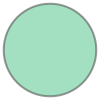

In [64]:
df_lpg_geo['geometry'][0]

In [ ]:
# LPG_points = []
# for i in tqdm(range(len(df_lpg_geo))):
#     LPG_points.append(point_cent.buffer(0.00000001).within(df_lpg_geo.loc[i,'geometry']))  
  

# df_reg['LPG_충전소'] = 0

# for i in range(len(LPG_points)):
#     df_reg['LPG_충전소'][LPG_points[i]] = 1  # 행정동이 아닌 grid에 맞춰 LPG 할당
# df_reg

**LPG 충전소 geojson 파일 업로드**

In [66]:
df_reg_lpg = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/LPG충전소_포함.geojson', encoding = 'cp949')

In [67]:
df_reg_lpg 

,gid,nomalized_pop,LPG 충전소,geometry
0,다사579454,0.010851,0,"POLYGON ((127.02366 37.50691, 127.02365 37.507..."
1,다사613448,0.017833,0,"POLYGON ((127.06216 37.50166, 127.06215 37.502..."
2,다사585452,0.001442,0,"POLYGON ((127.03046 37.50514, 127.03045 37.506..."
3,다사583456,0.034831,0,"POLYGON ((127.02817 37.50874, 127.02817 37.509..."
4,다사585468,0.000683,0,"POLYGON ((127.03037 37.51956, 127.03036 37.520..."
...,...,...,...,...
64671,다사656567,0.000000,0,"POLYGON ((127.11025 37.60908, 127.11024 37.609..."
64672,다사636570,0.000000,0,"POLYGON ((127.08757 37.61171, 127.08757 37.612..."
64673,다사628533,0.000000,1,"POLYGON ((127.07870 37.57833, 127.07869 37.579..."
64674,다사661574,0.000000,0,"POLYGON ((127.11588 37.61541, 127.11588 37.616..."


In [68]:
# df_reg['LPG_충전소'].value_counts()

In [69]:
df_reg_lpg.columns

Index(['gid', 'nomalized_pop', 'LPG 충전소', 'geometry'], dtype='object')

In [70]:
df_reg_lpg = df_reg_lpg.drop(['gid', 'nomalized_pop', 'geometry'],  axis=1)

In [71]:
df_reg_lpg

,LPG 충전소
0,0
1,0
2,0
3,0
4,0
...,...
64671,0
64672,0
64673,1
64674,0


### **LPG buffer 없이**

In [72]:
df_lpg_nb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/전국_LPG충전소_현황_경도위도.csv')

In [73]:
df_lpg_nb = df_lpg_nb[df_lpg_nb['행정 구역'].str.contains('서울')]
df_lpg_nb

,행정 구역,업소명,소재지,전화번호,관리구분,입력주소,경도,위도
0,서울 강남구,강남복지충전소,서울 강남구 자곡동 373-1 (1층),02-445-3300,자동차충전,서울 강남구 자곡동 373-1 (1층),127.105495,37.476386
1,서울 강남구,(주)진양가스,서울 강남구 도곡동 552-4,02-3463-6811,자동차충전,서울 강남구 도곡동 552-4,127.035691,37.490497
2,서울 강남구,대치에너지주식회사,서울 강남구 대치동 27-15,02-3412-2828,자동차충전,서울 강남구 대치동 27-15,127.078101,37.499342
3,서울 강남구,남서울가스(주),서울 강남구 대치동 21-1,02-3411-4411,용기+자동차+13kg용기,서울 강남구 대치동 21-1,127.075564,37.497799
4,서울 강남구,(주)수서에너지,서울 강남구 자곡동 204-1.3,02-445-1083,자동차충전,서울 강남구 자곡동 204-1.3,127.113228,37.481193
...,...,...,...,...,...,...,...,...
74,서울 은평구,은평서부충전소,서울 은평구 진관동 35 (은평서부충전소 제1동),02-352-4806,자동차충전,서울 은평구 진관동 35 (은평서부충전소 제1동),126.921229,37.643674
75,서울 중랑구,신내LPG충전소,서울 중랑구 신내동 317-7,02-2208-5151,자동차충전,서울 중랑구 신내동 317-7,127.098130,37.613902
76,서울 중랑구,(주)풍림에너지,서울 중랑구 면목5동 169-6,02-434-0557,자동차충전,서울 중랑구 면목5동 169-6,127.079308,37.579608
77,서울 중랑구,동일석유(주)황금충전소,서울 중랑구 중화2동 208-11,02-435-2627,자동차충전,서울 중랑구 중화2동 208-11,127.075901,37.594187


In [74]:
shapely.speedups.enable()

In [75]:
# 기존 LPG 충전소 위치 

df_lpg_nb_geo = []
for i in range(len(df_lpg_nb)):
   df_lpg_nb_geo.append([df_lpg_nb.loc[i,'업소명'],Point(df_lpg_nb.loc[i,'경도'],df_lpg_nb.loc[i,'위도']).buffer(0.00054)]) 

In [76]:
# df_lpg 좌표 생성

df_lpg_nb_geo = pd.DataFrame(df_lpg_nb_geo )
df_lpg_nb_geo.columns = ["업소명", "geometry"]
# point_cent.buffer(0.00000001).within(df_lpg_nb_geo.loc[i,'geometry'])

In [77]:
LPG_nb_points = []
for i in tqdm(range(len(df_lpg_nb_geo))):
    LPG_nb_points.append(point_cent.buffer(0.00000001).within(df_lpg_nb_geo.loc[i,'geometry']))  
  

df_reg['LPG_충전소_nb'] = 0

for i in range(len(LPG_nb_points)):
    df_reg['LPG_충전소_nb'][LPG_nb_points[i]] = 1  
df_reg

  0%|          | 0/79 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1021: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851,0
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833,0
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442,0
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831,0
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683,0
...,...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000,0
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000,0
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000,0
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000,0


In [78]:
df_reg['LPG_충전소_nb'].value_counts()

0    64597
1       79
Name: LPG_충전소_nb, dtype: int64

In [80]:
df_reg[['geometry', 'LPG_충전소_nb']].to_file("/content/drive/MyDrive/Colab Notebooks/MCLP_H2/LPG_노버퍼.geojson", driver="GeoJSON")

In [81]:
df_reg

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851,0
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833,0
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442,0
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831,0
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683,0
...,...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000,0
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000,0
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000,0
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000,0


In [82]:
df_reg

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851,0
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833,0
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442,0
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831,0
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683,0
...,...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000,0
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000,0
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000,0
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000,0


## **기존 수소충전소 위치 분석**

In [83]:
df_h2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/H2_long_lat.csv', encoding='cp949')

In [84]:
df_h2 = df_h2[df_h2['주소'].str.contains('서울')]
df_h2

,No,충전소명,구분,공급방식,주소,용도,입력주소,X,Y,경도,위도,CLSS
24,40,강동구 상일동 수소충전소,저장식,튜브트레일러,서울 강동구 상일동 443-9,상업용,서울 강동구 상일동 443-9,970895,1949597,127.170523,37.545251,정좌표
25,7,서울특별시 상암수소스테이션,제조식,개질(NG+매립가스),서울 마포구 하늘공원로 86,상업용,서울 마포구 하늘공원로 86,945341,1952620,126.881034,37.571335,정좌표
26,6,현대자동차㈜ 양재그린에너지스테이션,저장식,튜브트레일러,서울 서초구 바우뫼로12길 73,상업용,서울 서초구 바우뫼로12길 73,958832,1941111,127.034450,37.468303,정좌표
27,34,수소에너지네트워크(주) 국회 수소충전소,저장식,튜브트레일러,서울 영등포구 의사당대로 1,상업용,서울 영등포구 의사당대로 1,948448,1948071,126.916537,37.530516,정좌표


In [85]:
df_h2 = df_h2.reset_index(drop=True)
df_h2

,No,충전소명,구분,공급방식,주소,용도,입력주소,X,Y,경도,위도,CLSS
0,40,강동구 상일동 수소충전소,저장식,튜브트레일러,서울 강동구 상일동 443-9,상업용,서울 강동구 상일동 443-9,970895,1949597,127.170523,37.545251,정좌표
1,7,서울특별시 상암수소스테이션,제조식,개질(NG+매립가스),서울 마포구 하늘공원로 86,상업용,서울 마포구 하늘공원로 86,945341,1952620,126.881034,37.571335,정좌표
2,6,현대자동차㈜ 양재그린에너지스테이션,저장식,튜브트레일러,서울 서초구 바우뫼로12길 73,상업용,서울 서초구 바우뫼로12길 73,958832,1941111,127.034450,37.468303,정좌표
3,34,수소에너지네트워크(주) 국회 수소충전소,저장식,튜브트레일러,서울 영등포구 의사당대로 1,상업용,서울 영등포구 의사당대로 1,948448,1948071,126.916537,37.530516,정좌표


In [86]:
df_h2_geo = []
for i in range(len(df_h2)):
   df_h2_geo.append([df_h2.loc[i,'충전소명'],Point(df_h2.loc[i,'경도'],df_h2.loc[i,'위도']).buffer(0.0027)]) # 반지름 250m 기준으로 하여 총 직경 500m 커버(250/0.9*0.00001 = 0.0027)

In [87]:
df_h2_geo = pd.DataFrame(df_h2_geo)
df_h2_geo.columns = ['충전소명', 'geometry']
df_h2_geo

,충전소명,geometry
0,강동구 상일동 수소충전소,"POLYGON ((127.1732228 37.5452509, 127.17320979..."
1,서울특별시 상암수소스테이션,"POLYGON ((126.8837342 37.571335, 126.883721198..."
2,현대자동차㈜ 양재그린에너지스테이션,"POLYGON ((127.03715 37.4683032, 127.0371369987..."
3,수소에너지네트워크(주) 국회 수소충전소,"POLYGON ((126.9192367 37.530516, 126.919223698..."


In [ ]:
# h2_points = []
# for i in tqdm(range(len(df_h2_geo))):
#     h2_points.append(point_cent.buffer(0.00000001).within(df_h2_geo.loc[i,'geometry'])) 
  

# df_reg['수소충전소'] = 0

# for i in range(len(h2_points)):
#     df_reg['수소충전소'][h2_points[i]] = 1   #행정동이 아닌 grid에 맞춰 수소충전소 할당
# df_reg

### **수소충전소 geojson으로 불러오기**


In [88]:
df_reg_h2station = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/수소충전소_포함.geojson', encoding = 'cp949')

In [89]:
df_reg_h2station

,gid,nomalized_pop,수소 충전소,geometry
0,다사579454,0.010851,0,"POLYGON ((127.02366 37.50691, 127.02365 37.507..."
1,다사613448,0.017833,0,"POLYGON ((127.06216 37.50166, 127.06215 37.502..."
2,다사585452,0.001442,0,"POLYGON ((127.03046 37.50514, 127.03045 37.506..."
3,다사583456,0.034831,0,"POLYGON ((127.02817 37.50874, 127.02817 37.509..."
4,다사585468,0.000683,0,"POLYGON ((127.03037 37.51956, 127.03036 37.520..."
...,...,...,...,...
64671,다사656567,0.000000,0,"POLYGON ((127.11025 37.60908, 127.11024 37.609..."
64672,다사636570,0.000000,0,"POLYGON ((127.08757 37.61171, 127.08757 37.612..."
64673,다사628533,0.000000,0,"POLYGON ((127.07870 37.57833, 127.07869 37.579..."
64674,다사661574,0.000000,0,"POLYGON ((127.11588 37.61541, 127.11588 37.616..."


In [90]:
df_reg_h2station = df_reg_h2station.drop(['gid', 'nomalized_pop', 'geometry'], axis=1)

In [ ]:
# df_reg['수소충전소'].value_counts()

## **제 1종 보호시설**

- 초중고등학교

In [91]:
df_school = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/ele_mid_long_lat.csv', encoding='utf-8')

In [92]:
df_school

,학교종류명,설립구분,학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,경도,위도,X,Y,CLSS
0,각종학교(중),사립,선화예술중학교,서울특별시성동광진교육지원청,4991,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),127.087646,37.550433,963576,1950201,정좌표
1,초등학교,공립,서울숭신초등학교,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),127.027815,37.567643,958301,1952135,정좌표
2,중학교,공립,행당중학교,서울특별시성동광진교육지원청,4764,서울특별시 성동구 왕십리로 189,(행당동/행당중학교),127.042270,37.554408,959570,1950660,정좌표
3,중학교,사립,한양대학교사범대학부속중학교,서울특별시성동광진교육지원청,4761,서울특별시 성동구 마조로 42,(사근동/한양사대부속중?고등학교),127.043029,37.561406,959641,1951437,정좌표
4,중학교,공립,자양중학교,서울특별시성동광진교육지원청,5069,서울특별시 광진구 뚝섬로41길 33,(자양동/서울자양중학교),127.074546,37.535329,962411,1948530,정좌표
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,고등학교,국립,국립국악고등학교,교육부,6311,서울특별시 강남구 개포로22길 65,/ (개포동/ 국립국악고등학교),127.051625,37.476110,960355,1941970,정좌표
1415,특수학교,국립,한국우진학교,교육부,3934,서울특별시 마포구 월드컵북로38길 21,/ 한국우진학교 (중동),126.903608,37.571258,947334,1952599,정좌표
1416,특수학교,국립,서울농학교,교육부,3032,서울특별시 종로구 필운대로 103,(신교동),126.968530,37.585143,953076,1954105,정좌표
1417,특수학교,국립,서울맹학교,교육부,3032,서울특별시 종로구 필운대로 97,(신교동),126.967677,37.584586,953000,1954043,정좌표


In [93]:
df_school = df_school[df_school['도로명주소'].str.contains('서울')]
df_school

,학교종류명,설립구분,학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,경도,위도,X,Y,CLSS
0,각종학교(중),사립,선화예술중학교,서울특별시성동광진교육지원청,4991,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),127.087646,37.550433,963576,1950201,정좌표
1,초등학교,공립,서울숭신초등학교,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),127.027815,37.567643,958301,1952135,정좌표
2,중학교,공립,행당중학교,서울특별시성동광진교육지원청,4764,서울특별시 성동구 왕십리로 189,(행당동/행당중학교),127.042270,37.554408,959570,1950660,정좌표
3,중학교,사립,한양대학교사범대학부속중학교,서울특별시성동광진교육지원청,4761,서울특별시 성동구 마조로 42,(사근동/한양사대부속중?고등학교),127.043029,37.561406,959641,1951437,정좌표
4,중학교,공립,자양중학교,서울특별시성동광진교육지원청,5069,서울특별시 광진구 뚝섬로41길 33,(자양동/서울자양중학교),127.074546,37.535329,962411,1948530,정좌표
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,고등학교,국립,국립국악고등학교,교육부,6311,서울특별시 강남구 개포로22길 65,/ (개포동/ 국립국악고등학교),127.051625,37.476110,960355,1941970,정좌표
1415,특수학교,국립,한국우진학교,교육부,3934,서울특별시 마포구 월드컵북로38길 21,/ 한국우진학교 (중동),126.903608,37.571258,947334,1952599,정좌표
1416,특수학교,국립,서울농학교,교육부,3032,서울특별시 종로구 필운대로 103,(신교동),126.968530,37.585143,953076,1954105,정좌표
1417,특수학교,국립,서울맹학교,교육부,3032,서울특별시 종로구 필운대로 97,(신교동),126.967677,37.584586,953000,1954043,정좌표


In [94]:
df_school= df_school.reset_index(drop=True)
df_school

,학교종류명,설립구분,학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,경도,위도,X,Y,CLSS
0,각종학교(중),사립,선화예술중학교,서울특별시성동광진교육지원청,4991,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),127.087646,37.550433,963576,1950201,정좌표
1,초등학교,공립,서울숭신초등학교,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),127.027815,37.567643,958301,1952135,정좌표
2,중학교,공립,행당중학교,서울특별시성동광진교육지원청,4764,서울특별시 성동구 왕십리로 189,(행당동/행당중학교),127.042270,37.554408,959570,1950660,정좌표
3,중학교,사립,한양대학교사범대학부속중학교,서울특별시성동광진교육지원청,4761,서울특별시 성동구 마조로 42,(사근동/한양사대부속중?고등학교),127.043029,37.561406,959641,1951437,정좌표
4,중학교,공립,자양중학교,서울특별시성동광진교육지원청,5069,서울특별시 광진구 뚝섬로41길 33,(자양동/서울자양중학교),127.074546,37.535329,962411,1948530,정좌표
...,...,...,...,...,...,...,...,...,...,...,...,...
1414,고등학교,국립,국립국악고등학교,교육부,6311,서울특별시 강남구 개포로22길 65,/ (개포동/ 국립국악고등학교),127.051625,37.476110,960355,1941970,정좌표
1415,특수학교,국립,한국우진학교,교육부,3934,서울특별시 마포구 월드컵북로38길 21,/ 한국우진학교 (중동),126.903608,37.571258,947334,1952599,정좌표
1416,특수학교,국립,서울농학교,교육부,3032,서울특별시 종로구 필운대로 103,(신교동),126.968530,37.585143,953076,1954105,정좌표
1417,특수학교,국립,서울맹학교,교육부,3032,서울특별시 종로구 필운대로 97,(신교동),126.967677,37.584586,953000,1954043,정좌표


In [95]:
df_school_geo = []
for i in range(len(df_school)):
   df_school_geo.append([df_school.loc[i,'학교명'],Point(df_school.loc[i,'경도'],df_school.loc[i,'위도']).buffer(0.00019)]) # 수소충전소 고압가스 규제 : 1종 보호시설로 부터 17m 이상의 안전거리를 유지할 것 : 17/0.9*0.00001 = 0.00018888... ~0.00019 

In [96]:
df_school_geo = pd.DataFrame(df_school_geo)
df_school_geo.columns = ['학교명', 'geometry']
df_school_geo

,학교명,geometry
0,선화예술중학교,"POLYGON ((127.087836 37.5504333, 127.087835085..."
1,서울숭신초등학교,"POLYGON ((127.0280049 37.56764329999999, 127.0..."
2,행당중학교,"POLYGON ((127.0424599 37.554408, 127.042458985..."
3,한양대학교사범대학부속중학교,"POLYGON ((127.0432192 37.56140629999999, 127.0..."
4,자양중학교,"POLYGON ((127.0747363 37.535329, 127.074735385..."
...,...,...
1414,국립국악고등학교,"POLYGON ((127.0518151 37.47611029999999, 127.0..."
1415,한국우진학교,"POLYGON ((126.9037977 37.5712585, 126.90379678..."
1416,서울농학교,"POLYGON ((126.96872 37.5851429, 126.9687190850..."
1417,서울맹학교,"POLYGON ((126.9678672 37.58458579999999, 126.9..."


In [ ]:
# school_points = []
# for i in tqdm(range(len(df_school_geo))):
#     school_points.append(point_cent.buffer(0.00000001).within(df_school_geo.loc[i,'geometry'])) 
  

# df_reg['초중고등학교'] = 0

# for i in range(len(school_points)):
#     df_reg['초중고등학교'][school_points[i]] = 1   #행정동이 아닌 grid에 맞춰 학교 할당
# df_reg

In [ ]:
# df_reg['초중고등학교'].value_counts()

In [ ]:
# df_reg.to_csv('df_reg_초중고.csv', encoding='utf-8')

**학교 geojson 불러오기**

In [97]:
df_reg_school = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/학교_포함.geojson', encoding = 'cp949')

In [98]:
df_reg_school

,gid,nomalized_pop,학교,geometry
0,다사579454,0.010851,0,"POLYGON ((127.02366 37.50691, 127.02365 37.507..."
1,다사613448,0.017833,0,"POLYGON ((127.06216 37.50166, 127.06215 37.502..."
2,다사585452,0.001442,0,"POLYGON ((127.03046 37.50514, 127.03045 37.506..."
3,다사583456,0.034831,0,"POLYGON ((127.02817 37.50874, 127.02817 37.509..."
4,다사585468,0.000683,0,"POLYGON ((127.03037 37.51956, 127.03036 37.520..."
...,...,...,...,...
64671,다사656567,0.000000,0,"POLYGON ((127.11025 37.60908, 127.11024 37.609..."
64672,다사636570,0.000000,0,"POLYGON ((127.08757 37.61171, 127.08757 37.612..."
64673,다사628533,0.000000,0,"POLYGON ((127.07870 37.57833, 127.07869 37.579..."
64674,다사661574,0.000000,0,"POLYGON ((127.11588 37.61541, 127.11588 37.616..."


In [99]:
df_reg_school = df_reg_school.drop(['gid', 'nomalized_pop', 'geometry'], axis=1)

- 어린이집


In [100]:
df_kid = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/kids_long_lat.csv', encoding='utf-8')

In [101]:
df_kid 

,교육청명,유치원명,설립유형,주소,운영시간,만3세학급수,만4세학급수,만5세학급수,혼합학급수,특수학급수,만3세유아수,만4세유아수,만5세유아수,혼합유아수,특수유아수,공시차수,경도,위도,X,Y,CLSS
0,서울특별시교육청,서울정심초등학교병설유치원,공립(병설),서울특별시 금천구 독산로78다길 89,07시30분~19시30분,1,1,1,0,1,4,14,12,0,2,20211,126.908319,37.471710,947681,1941552,정좌표
1,서울특별시교육청,서울솔방울유치원,공립(단설),서울특별시 송파구 오금로24길 25,09시30분~20시00분,2,2,2,0,0,30,41,40,0,0,20211,127.117404,37.504859,966184,1945134,정좌표
2,서울특별시교육청,란키즈유치원,사립(사인),서울특별시 송파구 새말로8길 22-5,09시00분~19시00분,1,1,2,0,0,11,15,28,0,0,20211,127.126292,37.480768,966959,1942458,정좌표
3,서울특별시교육청,서울신현초등학교병설유치원,공립(병설),서울특별시 중랑구 봉화산로 188,07시30분~19시30분,1,1,1,0,1,15,11,13,0,4,20211,127.093471,37.605784,964117,1956340,정좌표
4,서울특별시교육청,다우림유치원,사립(사인),서울특별시 은평구 증산로21길 22,08시00분~20시00분,1,1,1,0,0,26,14,27,0,0,20211,126.912335,37.596235,948122,1955365,정좌표
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
907,서울특별시교육청,서울강솔초등학교병설유치원,공립(병설),서울특별시 강동구 고덕로97길 80,09시00분~19시30분,2,2,2,0,2,30,40,47,0,10,20192,127.180342,37.562097,971768,1951463,정좌표
908,서울특별시교육청,서울학동초등학교병설유치원,공립(병설),서울특별시 강남구 선릉로115길 42,07시00분~19시30분,1,1,1,0,0,9,17,11,0,0,20211,127.039551,37.512253,959307,1945985,정좌표
909,서울특별시교육청,서울가양초등학교병설유치원,공립(병설),서울특별시 강서구 허준로 186,07시30분~19시30분,1,1,1,0,0,13,20,16,0,0,20211,126.858630,37.561804,943355,1951576,정좌표
910,서울특별시교육청,서울송파초등학교병설유치원,공립(병설),서울특별시 송파구 백제고분로 400,07시30분~19시30분,1,1,1,0,0,8,15,23,0,0,20211,127.110964,37.507126,965616,1945388,정좌표


In [102]:
df_kid  =  df_kid .drop(['운영시간',	'만3세학급수',	'만4세학급수',	'만5세학급수',	'혼합학급수',	'특수학급수',	'만3세유아수',	'만4세유아수',	'만5세유아수',	'혼합유아수',	'특수유아수',	'공시차수'],  axis=1)
df_kid 

,교육청명,유치원명,설립유형,주소,경도,위도,X,Y,CLSS
0,서울특별시교육청,서울정심초등학교병설유치원,공립(병설),서울특별시 금천구 독산로78다길 89,126.908319,37.471710,947681,1941552,정좌표
1,서울특별시교육청,서울솔방울유치원,공립(단설),서울특별시 송파구 오금로24길 25,127.117404,37.504859,966184,1945134,정좌표
2,서울특별시교육청,란키즈유치원,사립(사인),서울특별시 송파구 새말로8길 22-5,127.126292,37.480768,966959,1942458,정좌표
3,서울특별시교육청,서울신현초등학교병설유치원,공립(병설),서울특별시 중랑구 봉화산로 188,127.093471,37.605784,964117,1956340,정좌표
4,서울특별시교육청,다우림유치원,사립(사인),서울특별시 은평구 증산로21길 22,126.912335,37.596235,948122,1955365,정좌표
...,...,...,...,...,...,...,...,...,...
907,서울특별시교육청,서울강솔초등학교병설유치원,공립(병설),서울특별시 강동구 고덕로97길 80,127.180342,37.562097,971768,1951463,정좌표
908,서울특별시교육청,서울학동초등학교병설유치원,공립(병설),서울특별시 강남구 선릉로115길 42,127.039551,37.512253,959307,1945985,정좌표
909,서울특별시교육청,서울가양초등학교병설유치원,공립(병설),서울특별시 강서구 허준로 186,126.858630,37.561804,943355,1951576,정좌표
910,서울특별시교육청,서울송파초등학교병설유치원,공립(병설),서울특별시 송파구 백제고분로 400,127.110964,37.507126,965616,1945388,정좌표


In [103]:
df_kid  = df_kid [df_kid['주소'].str.contains('서울')]
df_kid 

,교육청명,유치원명,설립유형,주소,경도,위도,X,Y,CLSS
0,서울특별시교육청,서울정심초등학교병설유치원,공립(병설),서울특별시 금천구 독산로78다길 89,126.908319,37.471710,947681,1941552,정좌표
1,서울특별시교육청,서울솔방울유치원,공립(단설),서울특별시 송파구 오금로24길 25,127.117404,37.504859,966184,1945134,정좌표
2,서울특별시교육청,란키즈유치원,사립(사인),서울특별시 송파구 새말로8길 22-5,127.126292,37.480768,966959,1942458,정좌표
3,서울특별시교육청,서울신현초등학교병설유치원,공립(병설),서울특별시 중랑구 봉화산로 188,127.093471,37.605784,964117,1956340,정좌표
4,서울특별시교육청,다우림유치원,사립(사인),서울특별시 은평구 증산로21길 22,126.912335,37.596235,948122,1955365,정좌표
...,...,...,...,...,...,...,...,...,...
907,서울특별시교육청,서울강솔초등학교병설유치원,공립(병설),서울특별시 강동구 고덕로97길 80,127.180342,37.562097,971768,1951463,정좌표
908,서울특별시교육청,서울학동초등학교병설유치원,공립(병설),서울특별시 강남구 선릉로115길 42,127.039551,37.512253,959307,1945985,정좌표
909,서울특별시교육청,서울가양초등학교병설유치원,공립(병설),서울특별시 강서구 허준로 186,126.858630,37.561804,943355,1951576,정좌표
910,서울특별시교육청,서울송파초등학교병설유치원,공립(병설),서울특별시 송파구 백제고분로 400,127.110964,37.507126,965616,1945388,정좌표


In [104]:
df_kid_geo = []
for i in range(len(df_kid)):
   df_kid_geo.append([df_kid.loc[i,'유치원명'],Point(df_kid.loc[i,'경도'],df_kid.loc[i,'위도']).buffer(0.00019)]) # 수소충전소 고압가스 규제 : 1종 보호시설로 부터 17m 이상의 안전거리를 유지할 것 : 17/0.9*0.00001 = 0.00018888... ~0.00019 

In [105]:
df_kid_geo = pd.DataFrame(df_kid_geo)
df_kid_geo.columns = ['유치원명', 'geometry']
df_kid_geo

,유치원명,geometry
0,서울정심초등학교병설유치원,"POLYGON ((126.9085094 37.4717104, 126.90850848..."
1,서울솔방울유치원,"POLYGON ((127.1175941 37.5048591, 127.11759318..."
2,란키즈유치원,"POLYGON ((127.1264819 37.4807678, 127.12648098..."
3,서울신현초등학교병설유치원,"POLYGON ((127.0936612 37.6057842, 127.09366028..."
4,다우림유치원,"POLYGON ((126.9125245 37.5962346, 126.91252358..."
...,...,...
907,서울강솔초등학교병설유치원,"POLYGON ((127.180532 37.56209699999999, 127.18..."
908,서울학동초등학교병설유치원,"POLYGON ((127.0397411 37.512253, 127.039740185..."
909,서울가양초등학교병설유치원,"POLYGON ((126.8588199 37.5618039, 126.85881898..."
910,서울송파초등학교병설유치원,"POLYGON ((127.1111543 37.5071265, 127.11115338..."


In [ ]:
# kid_points = []
# for i in tqdm(range(len(df_kid_geo))):
#     kid_points .append(point_cent.buffer(0.00000001).within(df_kid_geo.loc[i,'geometry'])) 
  

# df_reg['유치원'] = 0

# for i in range(len(kid_points )):
#     df_reg['유치원'][kid_points [i]] = 1   #행정동이 아닌 grid에 맞춰 유치원 할당
# df_reg

In [ ]:
# df_reg[['gid','geometry','nor_pop', '유치원']].to_file("/content/drive/MyDrive/Colab Notebooks/MCLP_H2 /유치원_포함.geojson", driver="GeoJSON")

In [ ]:
# df_reg['유치원'].value_counts()

In [ ]:
# df_reg.to_csv('df_reg_유치원.csv', encoding='utf-8')

**유치원 geojson 파일 불러오기**

In [106]:
df_reg_kids = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/MCLP_H2/유치원_포함.geojson', encoding = 'cp949')

In [107]:
df_reg_kids

,gid,nor_pop,유치원,geometry
0,다사579454,0.010851,0,"POLYGON ((127.02366 37.50691, 127.02365 37.507..."
1,다사613448,0.017833,0,"POLYGON ((127.06216 37.50166, 127.06215 37.502..."
2,다사585452,0.001442,0,"POLYGON ((127.03046 37.50514, 127.03045 37.506..."
3,다사583456,0.034831,0,"POLYGON ((127.02817 37.50874, 127.02817 37.509..."
4,다사585468,0.000683,0,"POLYGON ((127.03037 37.51956, 127.03036 37.520..."
...,...,...,...,...
64671,다사656567,0.000000,0,"POLYGON ((127.11025 37.60908, 127.11024 37.609..."
64672,다사636570,0.000000,0,"POLYGON ((127.08757 37.61171, 127.08757 37.612..."
64673,다사628533,0.000000,0,"POLYGON ((127.07870 37.57833, 127.07869 37.579..."
64674,다사661574,0.000000,0,"POLYGON ((127.11588 37.61541, 127.11588 37.616..."


In [108]:
df_reg_kids = df_reg_kids.drop(['gid', 'nor_pop', 'geometry'], axis =1)
df_reg_kids

,유치원
0,0
1,0
2,0
3,0
4,0
...,...
64671,0
64672,0
64673,0
64674,0


## **concat_df_reg**

In [109]:
df_reg

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851,0
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833,0
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442,0
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831,0
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683,0
...,...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000,0
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000,0
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000,0
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000,0


In [110]:
df_reg_school

,학교
0,0
1,0
2,0
3,0
4,0
...,...
64671,0
64672,0
64673,0
64674,0


In [111]:
df_total_con = pd.concat([df_reg, df_reg_h2car, df_reg_lpg, df_reg_car, df_reg_kids, df_reg_school, df_reg_h2station], axis=1)

In [112]:
df_total_con.columns

Index(['gid', 'geometry', 'coordinates', 'coord_cent', 'geo_cent', 'nor_pop',
       'LPG_충전소_nb', 'nor_h2car', 'LPG 충전소', '자동차등록', 'nor_car', '유치원', '학교',
       '수소 충전소'],
      dtype='object')

In [113]:
df_total_con = df_total_con.drop(['자동차등록'], axis=1)

In [114]:
df_total_con 

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb,nor_h2car,LPG 충전소,nor_car,유치원,학교,수소 충전소
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851,0,0.084906,0,0.323459,0,0,0
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833,0,0.160377,0,0.603507,0,0,0
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442,0,0.113208,0,0.584473,0,0,0
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831,0,0.084906,0,0.323459,0,0,0
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683,0,0.084906,0,0.323459,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000,0,0.037736,0,0.228704,0,0,0
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000,0,0.047170,0,0.305783,0,0,0
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000,0,0.075472,1,0.579178,0,0,0
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000,0,0.047170,0,0.305783,0,0,0


## **충전소 위치선정에 대한 영향 요소 분석 및 상관관계 분석**

수소차 충전소 위치 선정을 최적화 문제로 풀 것이다. 이를 위해 목적함수가 필요하며 다음과 같은 기준으로 식을 세웠다.

가정

수소차 충전소 위치는 인구현황, 자동차 등록대수, 자동차 등록대수만 고려하여 위치를 선정한다. 기존 설치된 전기자동차 충전소는 위 고려사항을 충분히 고려하여 만들어진 곳이다.

충전소는 전방 약 500m(?)를 커버할 수 있다.

분석 방법

고려되는 모든 변수들은 정규화 하였다.

선형회귀분석을 이용해 수소자동차 충전소 위치에 영향을 주는 요소의 관계를 분석하였다.(Linear Regrssion)

분석 Input: (정규화된) 인구현황, 자동차 등록대수

분석 Output: 고려되는 요소들과 각 충전소 사이의 상관계수

In [115]:
df_total_con 

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb,nor_h2car,LPG 충전소,nor_car,유치원,학교,수소 충전소
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851,0,0.084906,0,0.323459,0,0,0
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833,0,0.160377,0,0.603507,0,0,0
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442,0,0.113208,0,0.584473,0,0,0
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831,0,0.084906,0,0.323459,0,0,0
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683,0,0.084906,0,0.323459,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000,0,0.037736,0,0.228704,0,0,0
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000,0,0.047170,0,0.305783,0,0,0
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000,0,0.075472,1,0.579178,0,0,0
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000,0,0.047170,0,0.305783,0,0,0


In [116]:
df_total_con = df_total_con.fillna(0)

### **OLS 회귀분석**

In [117]:
df_total_con.rename(columns = {'LPG 충전소' : 'LPG'}, inplace= True)

In [118]:
import statsmodels.api as sm


# 다중 선형회귀분석
x_data = df_total_con[["nor_pop","nor_car", "nor_h2car", 'LPG']] #변수 여러개
target = df_total_con[["LPG"]]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LPG   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.282e+34
Date:                Wed, 29 Sep 2021   Prob (F-statistic):               0.00
Time:                        02:06:30   Log-Likelihood:             2.2815e+06
No. Observations:               64676   AIC:                        -4.563e+06
Df Residuals:                   64671   BIC:                        -4.563e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.965e-19   7.34e-19      0.268      0.789   -1.24e-18    1.63e-18
nor_pop     1.381e-15   2.53e-17     54.575      0.000    1.33e-15    1.43e-15
nor_car    -7.589e-17      2e-18    -37.908      0.000   -7.98e-17    -7.2e-17
nor_h2car  -1.691e-17   3.96e-18     -4.275      0.000   -2.47e-17   -9.16e-18
LPG            1.0000   2.76e-18   3.62e+17      0.000       1.000       1.000
==============================================================================
Omnibus:                    64102.096   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2218357.097
Skew:                          -5.166   Prob(JB):                         0.00
Kurtosis:                      29.767   Cond. No.                         58.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
x_data1.corr()

,const,nor_pop,nor_car,nor_h2car,LPG
const,NaN,NaN,NaN,NaN,NaN
nor_pop,NaN,1.000000,0.143872,0.051514,0.014941
nor_car,NaN,0.143872,1.000000,0.478801,0.020720
nor_h2car,NaN,0.051514,0.478801,1.000000,0.001336
LPG,NaN,0.014941,0.020720,0.001336,1.000000


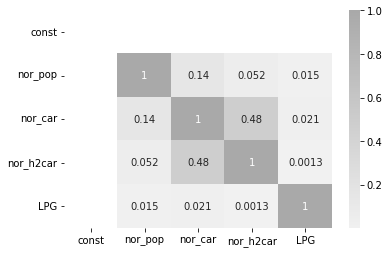

In [120]:
# 상관행렬 시각화
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(x_data1.corr(), annot = True, cmap = cmap)
plt.show()

In [121]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif["VIF Factor"] = [variance_inflation_factor(x_data1.values, i) for i in range(x_data1.shape[1])]
# vif["features"] = x_data1.columns
# vif

In [122]:
# from statsmodels.formula.api import ols
# res = ols(formula='LPG ~ nor_pop + nor_car + nor_h2car', data=df_total_con).fit()
# res.summary()

In [123]:
# objective function 만들기
from sklearn.linear_model import LinearRegression
from sklearn import linear_model


X = df_total_con[["nor_pop","nor_car", "nor_h2car"]]
y = df_total_con["LPG"]
regr = linear_model.LinearRegression()
regr.fit(X, y)
lpg_coeff = regr.coef_
print('LPG충전소 Intercept: ', regr.intercept_)
print('LPG충전소 Coefficients: \n', lpg_coeff)



LPG충전소 Intercept:  0.023412605402943223
LPG충전소 Coefficients: 
 [ 0.10901631  0.01526038 -0.01367081]


In [124]:
df_total_con['w'] = 0 
df_total_con['w'] = (lpg_coeff[0]*df_total_con['nor_pop']+
                     lpg_coeff[1]*df_total_con['nor_car']+
                     lpg_coeff[2]*df_total_con['nor_h2car'])

In [125]:
df_total_con

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb,nor_h2car,LPG,nor_car,유치원,학교,수소 충전소,w
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851,0,0.084906,0,0.323459,0,0,0,0.004958
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833,0,0.160377,0,0.603507,0,0,0,0.008961
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442,0,0.113208,0,0.584473,0,0,0,0.007529
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831,0,0.084906,0,0.323459,0,0,0,0.007572
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683,0,0.084906,0,0.323459,0,0,0,0.003850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000,0,0.037736,0,0.228704,0,0,0,0.002974
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000,0,0.047170,0,0.305783,0,0,0,0.004022
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000,0,0.075472,1,0.579178,0,0,0,0.007807
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000,0,0.047170,0,0.305783,0,0,0,0.004022


## **MCLP 후 제거할 feauture 고려**

# III. 최적화 문제 정의 및 해결

## 전기자동차 충전소 위치 선정 최적화 모델 정의 및 결과

### 최적화 모델 : Maximal Covering Location Problem (MCLP)

- 정의: MCLP는 최대지역커버문제로, 설비가 커버하는 수요 (covered demand)의 합을 최대화 하면서 주어진 K개의 설비를 세울 위치를 선정하는 문제 
- 가정

    - 설비의 위치가 수요 발생 지점으로부터 일정 거리 Residual 이내에 수요를 커버함. 
    - 이때 거리 Residual은 커버리지 거리(covered distance) 라고 함.
    - 커버되지 못한 수여는 서비스를 받지 못하는 수요가 아니라 서비스를 받긴 하지만 서비스 받는 설비로 부터의 거리가 커버리지 밖에 있어 만족할 만한 서비스 수준을 제공받지 못하는 수요를 의미
    
    
- Mathematical statement


    - i : 수요 포인트 index
    - j : 설비 후보지역 index
    - I : 수요 포인트 집합
    - J : 설비 후보지역 집합
    - K : 총 설치해야 하는 설비 개수
    - x : 설비 후보 지역 중 위치 j에 설비가 설치되면 1, 그렇지 않으면 0
    - y : 적어도 하나의 설비로 그 포인트가 커버가 되면 1, 그렇지 않으면 0
    
    
- Formulation

$$
\begin{align*}
&\text{maximize} \sum_{i\in I} w_i y_i ...(1) \\
\text{s.t.} \quad & y_i \le \sum_{j\in N_i}x_j \qquad for \quad all \quad i\in I ... (2)\\
&\sum_{j\in J}x_j = K ... (3)\\
&x_j, y_i \in \{0,1\} \qquad for \quad all \quad i\in I,j\in J 
\end{align*}
$$
    

    -(1) : 목적함수, 가중치 w인 수요 포인트를 최대한 많이 커버하게 해라
    -(2) : 수요포인트 i는 설비 후보 지역이 커버하는 거리안에서 적어도 하나 이상의 설비로 부터 커버가 된다. 
    -(3) : 총 설치할 설비는 K개 이다.


In [126]:
def generate_candidate_sites(points,M=100):
    '''
    Generate M candidate sites with the convex hull of a point set
    Input:
        points: a Numpy array with shape of (N,2)
        M: the number of candidate sites to generate
    Return:
        sites: a Numpy array with shape of (M,2)
    '''
    hull = ConvexHull(points)
    polygon_points = points[hull.vertices]
    poly = Polygon(polygon_points)
    min_x, min_y, max_x, max_y = poly.bounds
    sites = []
    while len(sites) < M:
        random_point = Point([random.uniform(min_x, max_x),
                             random.uniform(min_y, max_y)])
        if (random_point.within(poly)):
            sites.append(random_point)
    return np.array([(p.x,p.y) for p in sites])




def generate_candidate_sites(df_result_fin,M=100):
    from shapely.geometry import Polygon, Point
    sites = []
    idx=np.random.choice(np.array(range(0,len(df_result_fin))), M)
    for i in range(len(idx)):
        random_point = Point(np.array(df_result_fin.iloc[idx]['coord_cent'])[i][0],
                             np.array(df_result_fin.iloc[idx]['coord_cent'])[i][1])
        sites.append(random_point)
    return np.array([(p.x,p.y) for p in sites])

def generate_candidate_sites(df_result_fin,Weight,M=100):
    sites = []
    idx = df_result_fin.sort_values(by = Weight, ascending = False).iloc[1:M].index
    for i in range(len(idx)):
        random_point = Point(np.array(df_result_fin.loc[idx]['coord_cent'])[i][0],
                             np.array(df_result_fin.loc[idx]['coord_cent'])[i][1])
        sites.append(random_point)
    return np.array([(p.x,p.y) for p in sites])



from scipy.spatial import distance_matrix
def mclp(points,K,radius,M,df_result_fin,w,Weight):

    """
    Solve maximum covering location problem
    Input:
        points: input points, Numpy array in shape of [N,2]
        K: the number of sites to select
        radius: the radius of circle
        M: the number of candidate sites, which will randomly generated inside
        the ConvexHull wrapped by the polygon
    Return:
        opt_sites: locations K optimal sites, Numpy array in shape of [K,2]
        f: the optimal value of the objective function
    """
    print('----- Configurations -----')
    print('  Number of points %g' % points.shape[0])
    print('  K %g' % K)
    print('  Radius %g' % radius)
    print('  M %g' % M)
    import time
    start = time.time()
    sites = generate_candidate_sites(df_result_fin,Weight,M)
    J = sites.shape[0]
    I = points.shape[0]
    D = distance_matrix(points,sites)
    mask1 = D<=radius
    D[mask1]=1
    D[~mask1]=0

    from mip import Model, xsum, maximize, BINARY

    # Build model
    m = Model("mclp")
    # Add variables

    x = [m.add_var(name = "x%d" % j, var_type = BINARY) for j in range(J)]
    y = [m.add_var(name = "y%d" % i, var_type = BINARY) for i in range(I)]


    m.objective = maximize(xsum(w[i]*y[i] for i in range (I)))

    m += xsum(x[j] for j in range(J)) == K

    for i in range(I):
        m += xsum(x[j] for j in np.where(D[i]==1)[0]) >= y[i]

    m.optimize()
    
    end = time.time()
    print('----- Output -----')
    print('  Running time : %s seconds' % float(end-start))
    print('  Optimal coverage points: %g' % m.objective_value)

    solution = []
    for i in range(J):
        if x[i].x ==1:
            solution.append(int(x[i].name[1:]))
    opt_sites = sites[solution]
            
    return opt_sites,m.objective_value



In [127]:
df_total_con

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb,nor_h2car,LPG,nor_car,유치원,학교,수소 충전소,w
0,다사579454,"POLYGON ((127.02366 37.50691, 127.02365 37.507...","[[127.02365968050171, 37.506914601530376], [12...","[127.02422252725493, 37.50736754818467]",POINT (127.0242225272549 37.50736754818467),0.010851,0,0.084906,0,0.323459,0,0,0,0.004958
1,다사613448,"POLYGON ((127.06216 37.50166, 127.06215 37.502...","[[127.06215948027773, 37.50165542657269], [127...","[127.06272252233191, 37.50210819142225]",POINT (127.0627225223319 37.50210819142225),0.017833,0,0.160377,0,0.603507,0,0,0,0.008961
2,다사585452,"POLYGON ((127.03046 37.50514, 127.03045 37.506...","[[127.03045945906214, 37.50513911088333], [127...","[127.03102233403118, 37.505592025461105]",POINT (127.0310223340312 37.50559202546111),0.001442,0,0.113208,0,0.584473,0,0,0,0.007529
3,다사583456,"POLYGON ((127.02817 37.50874, 127.02817 37.509...","[[127.02817399202097, 37.508735434639526], [12...","[127.02873687983652, 37.50918835992229]",POINT (127.0287368798365 37.50918835992229),0.034831,0,0.084906,0,0.323459,0,0,0,0.007572
4,다사585468,"POLYGON ((127.03037 37.51956, 127.03036 37.520...","[[127.03036910565191, 37.51956046175856], [127...","[127.0309320874575, 37.52001337639122]",POINT (127.0309320874575 37.52001337639122),0.000683,0,0.084906,0,0.323459,0,0,0,0.003850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64671,다사656567,"POLYGON ((127.11025 37.60908, 127.11024 37.609...","[[127.11024910985043, 37.609084860639115], [12...","[127.1108132479357, 37.60953739424148]",POINT (127.1108132479357 37.60953739424148),0.000000,0,0.037736,0,0.228704,0,0,0,0.002974
64672,다사636570,"POLYGON ((127.08757 37.61171, 127.08757 37.612...","[[127.08757476618378, 37.61171182903439], [127...","[127.08813878557406, 37.61216447014212]",POINT (127.0881387855741 37.61216447014212),0.000000,0,0.047170,0,0.305783,0,0,0,0.004022
64673,다사628533,"POLYGON ((127.07870 37.57833, 127.07869 37.579...","[[127.07869875782075, 37.57833067893143], [127...","[127.07926247306095, 37.57878336317809]",POINT (127.079262473061 37.57878336317809),0.000000,0,0.075472,1,0.579178,0,0,0,0.007807
64674,다사661574,"POLYGON ((127.11588 37.61541, 127.11588 37.616...","[[127.11588152571534, 37.615412737824094], [12...","[127.11644574563599, 37.61586524446711]",POINT (127.116445745636 37.61586524446711),0.000000,0,0.047170,0,0.305783,0,0,0,0.004022


In [128]:
df_result_fin = df_total_con[(df_total_con['수소 충전소']!=1) & (df_total_con['학교']!=1) & (df_total_con['유치원']!=1) & (df_total_con['LPG_충전소_nb']!=0)]
df_result_fin

,gid,geometry,coordinates,coord_cent,geo_cent,nor_pop,LPG_충전소_nb,nor_h2car,LPG,nor_car,유치원,학교,수소 충전소,w
998,다사589435,"POLYGON ((127.03508 37.48983, 127.03507 37.490...","[[127.03508001934334, 37.489834279067566], [12...","[127.03564280856325, 37.49028717221718]",POINT (127.0356428085633 37.49028717221718),0.004022,1,0.150943,1,0.350412,0,0,0,0.003722
2169,다사624443,"POLYGON ((127.07463 37.49719, 127.07462 37.498...","[[127.07462980676785, 37.49719418793485], [127...","[127.07519289146198, 37.497646893946445]",POINT (127.075192891462 37.49764689394645),0.000000,1,0.160377,1,0.603507,0,0,0,0.007017
2717,다사651419,"POLYGON ((127.10529 37.47567, 127.10528 37.476...","[[127.10528814800419, 37.47566788740295], [127...","[127.10585125867313, 37.47612044907819]",POINT (127.1058512586731 37.47612044907819),0.000000,1,0.084906,1,0.132715,0,0,0,0.000865
2948,다사627445,"POLYGON ((127.07801 37.49901, 127.07801 37.499...","[[127.0780134892437, 37.49900904441552], [127....","[127.07857660804297, 37.49946173436689]",POINT (127.078576608043 37.49946173436689),0.000000,1,0.160377,1,0.603507,0,0,0,0.007017
4899,다사672486,"POLYGON ((127.12874 37.53614, 127.12873 37.537...","[[127.12873930359741, 37.53613507495703], [127...","[127.12930300805077, 37.53658752343383]",POINT (127.1293030080508 37.53658752343383),0.005995,1,0.188679,1,0.341844,0,0,0,0.003291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62877,다사648557,"POLYGON ((127.10123 37.60004, 127.10123 37.600...","[[127.10123345181492, 37.600041290607784], [12...","[127.10179746709419, 37.60049386730157]",POINT (127.1017974670942 37.60049386730157),0.009334,1,0.037736,1,0.228704,0,0,0,0.003992
62995,다사645572,"POLYGON ((127.09776 37.61355, 127.09776 37.614...","[[127.0977621507796, 37.61354967997863], [127....","[127.09832624614305, 37.61400227269211]",POINT (127.098326246143 37.61400227269211),0.009030,1,0.047170,1,0.305783,0,0,0,0.005006
63128,다사625550,"POLYGON ((127.07521 37.59364, 127.07521 37.594...","[[127.07521418842668, 37.593641092050376], [12...","[127.0757779969872, 37.5940937923385]",POINT (127.0757779969872 37.5940937923385),0.008044,1,0.047170,1,0.182763,0,0,0,0.003021
64170,다사622575,"POLYGON ((127.07169 37.61616, 127.07168 37.617...","[[127.07168680839452, 37.616161947410575], [12...","[127.07225076410207, 37.61661466373351]",POINT (127.0722507641021 37.61661466373351),0.000000,1,0.094340,1,0.364615,0,0,0,0.004274


In [129]:
import numpy as np

In [130]:
pip install mip

     |████████████████████████████████| 48.0 MB 51 kB/s 


In [160]:
points = []
for i in df_result_fin['coord_cent'] :
    points.append(i)

w= []
for i in df_result_fin['w'] :
    w.append(i)

In [188]:
total = pd.DataFrame()
for i in range(1,78):
  radius = radius = (1/88.74/1000)*500   
  K = i
  M = 78

  opt_sites_org,f = mclp(np.array(points),K,radius,M,df_result_fin,w,'w') 
  df_opt= pd.DataFrame(opt_sites_org)
  df_opt.insert(2, 'num', i, True)
  df_opt.columns = ['lon', 'lat','num']
  i = str(i)
  divi = {'num':i,'lon':'번','lat':'데이터'}
  total = total.append(divi, ignore_index = True)
  total = total.append(df_opt, ignore_index = True)
  total = total[['num', 'lon', 'lat']]
  
  print(total)
    

total.to_csv('/content/drive/MyDrive/test/total.csv', encoding='euc-kr')

----- Configurations -----
  Number of points 78
  K 1
  Radius 0.00563444
  M 78
Cgl0002I 1 variables fixed
Cgl0004I processed model has 0 rows, 0 columns (0 integer (0 of which binary)) and 0 elements
Cgl0015I Clique Strengthening extended 0 cliques, 0 were dominated
Cbc3007W No integer variables - nothing to do
Total time (CPU seconds):       0.01   (Wallclock seconds):       0.01

Starting solution of the Linear programming relaxation problem using Primal Simplex

Coin0506I Presolve 73 (-6) rows, 136 (-19) columns and 212 (-48) elements
Clp1000I sum of infeasibilities 0 - average 0, 81 fixed columns
Coin0506I Presolve 0 (-73) rows, 0 (-136) columns and 0 (-212) elements
Clp0000I Optimal - objective value -0
Clp0000I Optimal - objective value -0
Coin0511I After Postsolve, objective 0, infeasibilities - dual 0 (0), primal 0 (0)
Clp0006I 0  Obj -0 Dual inf 0.33368753 (73)
Clp0014I Perturbing problem by 0.001% of 1.0656942 - largest nonzero change 9.7649325e-05 ( 0.0097649325%) - large

In [ ]:
# layer = pdk.Layer('PolygonLayer', # 사용할 Layer 타입 
#                   df_reg, # 시각화에 쓰일 데이터프레임
#                   #df_result_fin[df_result_fin['val']!=0],
#                   get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름 
#                   get_fill_color='[0, 255*1, 0,140]', # 각 데이터 별 rgb 또는 rgba 값 (0~255) 
#                   pickable=True, # 지도와 interactive 한 동작 on 
#                   auto_highlight=True # 마우스 오버(hover) 시 박스 출력 
#                  ) 


# # Set the viewport location 
# center = [127.0076, 37.5437] 
# view_state = pdk.ViewState( 
#     longitude=center[0], 
#     latitude=center[1], 
#     zoom=10
# ) 


# opt = pdk.Layer(
#     'ScatterplotLayer',
#     df_opt_h2,
#     get_position = ['lon','lat'],
#     auto_highlight=True,
#     get_radius=200,
#     get_fill_color='[255, 255, 0]',
#     get_line_color = '[0, 0, 0]',
#     line_width_min_pixels=5,
#     pickable=True)



# # Render 
# r = pdk.Deck(layers=[layer,opt],
#              initial_view_state=view_state,
#             api_keys = {'mapbox' : "pk.eyJ1Ijoia2tra2trYW4iLCJhIjoiY2tzemcwMmRvMnRsaTMxbnY0MjlidjU4NCJ9.iJ2LgGMqRh1WLDPQ5epWyg"},
#             map_style='road')

    
# r.to_html()

In [132]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

In [133]:
map=folium.Map(location=[df_opt_h2['lat'].mean(),df_opt_h2['lon'].mean()], zoom_start=11.5 )

for i in df_opt_h2.index:
  folium.Marker([ df_opt_h2.loc[i,'lat'], df_opt_h2.loc[i,'lon'] ], icon=folium.Icon(color='red')).add_to(map)    
  folium.CircleMarker( [ df_opt_h2.loc[i,'lat'], df_opt_h2.loc[i,'lon'] ], radius=10,color='red',fill_color='red').add_to(map)   

map

In [ ]:
df_reg.to_csv('/content/drive/MyDrive/total.csv', encoding='utf-8')